In [2]:
!pip3 install numpy

In [6]:
!pip3 install matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.1/159.1 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 27.6 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.6/242.6 kB 21.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 32.7 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 27.8 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.1/103.1 kB 16.7 MB/s eta 0:00:00


In [18]:
import numpy as np
from scipy.io import wavfile
from matplotlib import pyplot as plt
from scipy.fft import fft, fftfreq
from scipy.fft import rfft, rfftfreq
from scipy.signal import spectrogram

In [51]:
SAMPLE_RATE = 22050
DURATION = 5

def generate_sine_wave(freq, sample_rate, duration):
    x = np.linspace(0, duration, sample_rate*duration, endpoint=False)
    frequencies = x*freq
    y = np.sin((2*np.pi)*frequencies)
    return x, y

In [214]:
x1, tone1 = generate_sine_wave(5000, SAMPLE_RATE, DURATION)


In [80]:
import librosa
freq = librosa.amplitude_to_db(np.abs(librosa.stft(tone1)), ref=np.max)
print(freq.shape)

(1025, 216)


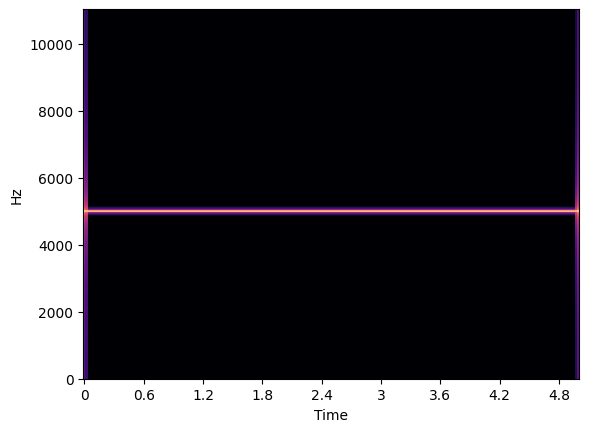

In [81]:
librosa.display.specshow(freq, y_axis='linear', x_axis='time')

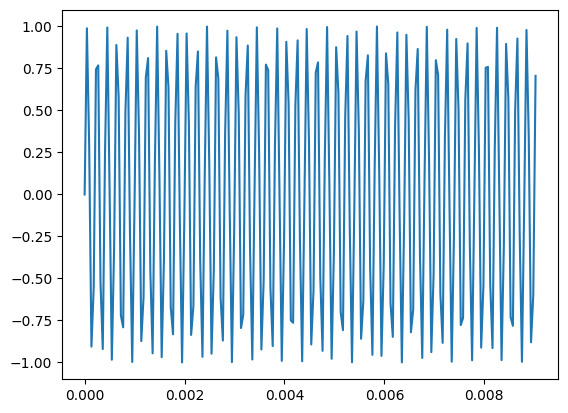

In [218]:
#showcasing that tone1 our y value is a sin wave
import matplotlib.pyplot as plt
plt.plot(x1[:200], tone1[:200])

In [220]:
#play audio
import sounddevice as sd
sd.play(tone1, SAMPLE_RATE)
sd.wait()

In [85]:
#save to a file
from scipy.io.wavfile import write
# Write it to a file
write("team2-sinetone.wav",SAMPLE_RATE,tone1)

In [279]:
#chirp signal
#time = x
def generate_chirp_signal(freq, sample_rate, duration):
    x = np.linspace(0, duration, sample_rate*duration, endpoint=False)
    #divide by duration to make it a chirp signal
    frequencies = (x*freq)/duration
    # frequencies = freq
    print(frequencies.max())
    print(frequencies[-1])
    y = np.sin((np.pi)*frequencies*x)
    return x, y, frequencies

SAMPLE_RATE = 22050
DURATION = 5

x1, tone2, t_freq = generate_chirp_signal(8000, SAMPLE_RATE, 5)

7999.927437641723
7999.927437641723


(1025, 216)


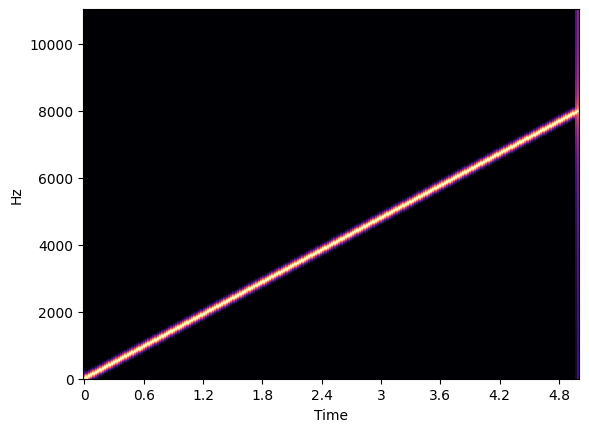

In [280]:
import librosa
freq = librosa.amplitude_to_db(np.abs(librosa.stft(tone2)), ref=np.max)
# freq = np.abs(librosa.stft(tone2))
print(freq.shape)
librosa.display.specshow(freq, y_axis='linear', x_axis='time')

In [172]:
#play audio
import sounddevice as sd
sd.play(tone2, SAMPLE_RATE)
sd.wait()

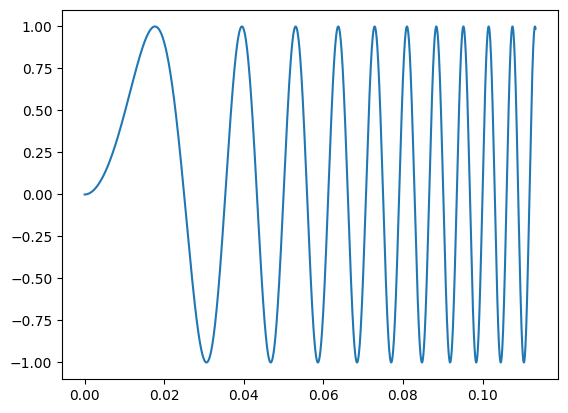

In [167]:
#showcasing that tone12 our y value is a sin wave and a chirp signal
import matplotlib.pyplot as plt
plt.plot(x1[:2500], tone2[:2500])

In [173]:
#save to a file tone2
from scipy.io.wavfile import write
# Write it to a file
write("team2-sinetone2.wav",SAMPLE_RATE,tone2)

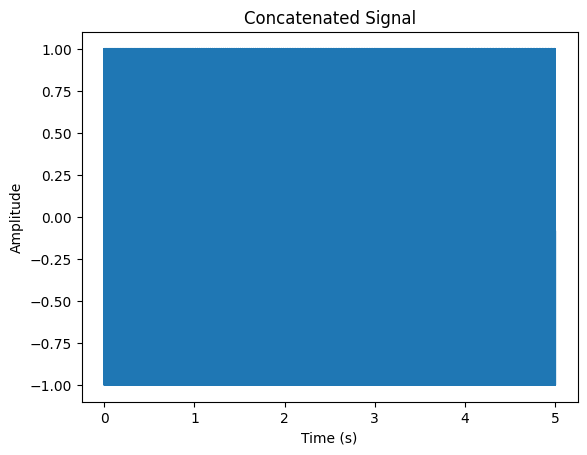

In [221]:
SAMPLE_RATE = 22050
DURATION = 5

def generate_sine_wave_CETK(freq, sample_rate, duration):
    x = np.linspace(0, duration, sample_rate*duration, endpoint=False)
    frequencies = x*freq
    y = np.sin((2*np.pi)*frequencies)
    return x, y

#x=time
#creating individual sine waves
x1, tonecetk1 = generate_sine_wave(466, SAMPLE_RATE, 1)
x2, tonecetk2 = generate_sine_wave(524, SAMPLE_RATE, 1)
x3, tonecetk3 = generate_sine_wave(415, SAMPLE_RATE, 1)
x4, tonecetk4 = generate_sine_wave(207, SAMPLE_RATE, 1)
x5, tonecetk5 = generate_sine_wave(311, SAMPLE_RATE, 1)

#concatenate
cetk_concatenated = np.concatenate([x1, x2 + 1, x3 + 2, x4 + 3, x5 + 4])
nice_tone = np.concatenate([tonecetk1, tonecetk2, tonecetk3, tonecetk4, tonecetk5])

#plot is just for us
plt.plot(cetk_concatenated, nice_tone)
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("Concatenated Signal")
plt.show()

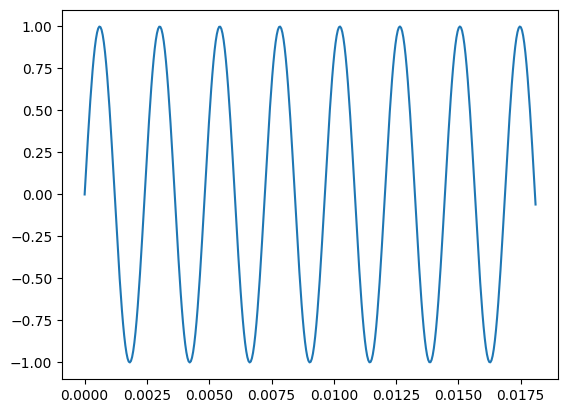

In [225]:
#testing frequencies of cetk signals
import matplotlib.pyplot as plt
plt.plot(x3[:400], tonecetk3[:400])

In [224]:
#play audio nice_tone
import sounddevice as sd
sd.play(nice_tone, SAMPLE_RATE)
sd.wait()

In [226]:
#save to a file cetk
from scipy.io.wavfile import write
# Write it to a file
write("team2-cetk.wav",SAMPLE_RATE,nice_tone)

(1025, 216)


(100.0, 700.0)

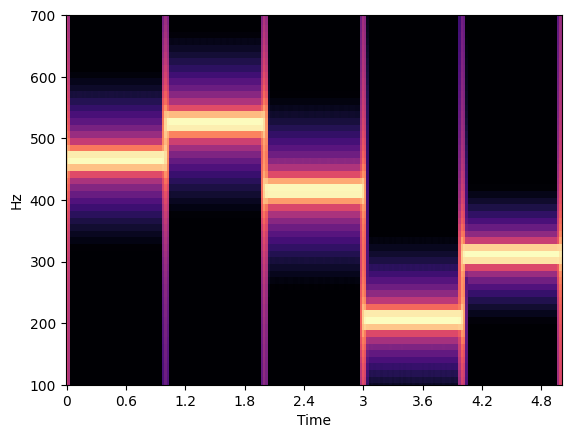

In [234]:
#spectrogram
import librosa
freq = librosa.amplitude_to_db(np.abs(librosa.stft(nice_tone)), ref=np.max)
# freq = np.abs(librosa.stft(tone2))
print(freq.shape)
librosa.display.specshow(freq, y_axis='linear', x_axis='time')

# Limit the frequency range to 1000 Hz
plt.ylim([100, 700])

In [245]:
# import necessary modules
import sounddevice as sd
from scipy.io.wavfile import write
%matplotlib inline
import matplotlib.pyplot as plt
import librosa.display
import IPython.display as ipd

#re recording
# Record duration in seconds
duration = 5
# Define Sampling Rate or Frequency in Hz
sr = 22050
# Start audio recording
recording = sd.rec(int(duration*sr), samplerate=sr, channels=1) # we will record with a  mono or stereo channel microphone

# Record audio for the given duration
print("recording...............")
sd.wait()

# Write it to a file
write("team2-soundproj1.wav",sr,recording)
# Look at the discrete number array we got from the audio

recording...............


In [250]:
#loading the project 1 audio
x, sr = librosa.load('team2-soundproj1.wav',mono=False)
ipd.Audio(x, rate=sr)

In [286]:
#question 5
SAMPLE_RATE = 22050
DURATION = 5

def generate_sine_wave(freq, sample_rate, duration):
    x = np.linspace(0, duration, sample_rate*duration, endpoint=False)
    frequencies = x*freq
    y = np.sin((2*np.pi)*frequencies)
    return x, y
x1_q5, tone1_q5 = generate_sine_wave(5000, SAMPLE_RATE, DURATION)
_, toneproj1 = librosa.load('team2-soundproj1.wav', mono=False)
nice_tone_q5 = tone1_q5 + toneproj1

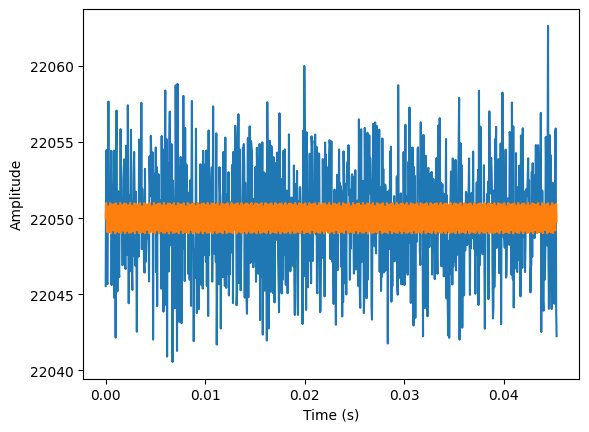

In [299]:
plt.plot(x1_q5[0:1000], mixed_tone_q5[0:1000])
plt.plot(x1_q5[0:1000],nice_tone_q5[0:1000])
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.show()

In [303]:
#play audio
import sounddevice as sd
sd.play(nice_tone_q5, SAMPLE_RATE)
sd.wait()

(1025, 216)


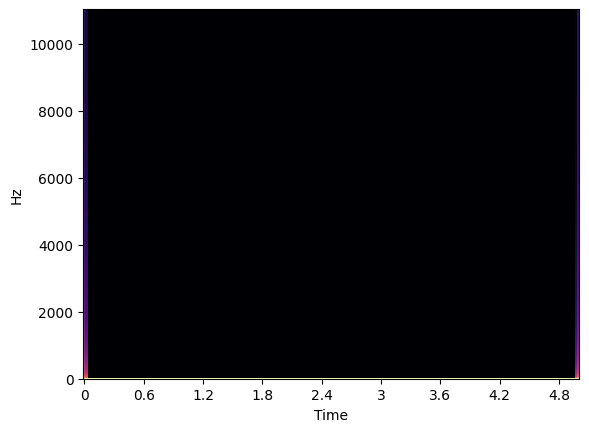

In [305]:
#spectrogram
import librosa
freq = librosa.amplitude_to_db(np.abs(librosa.stft(nice_tone_q5)), ref=np.max)
# freq = np.abs(librosa.stft(tone2))
print(freq.shape)
librosa.display.specshow(freq, y_axis='linear', x_axis='time')